 ### Part 1: Web Scraping (Using Python)

#### question 1. Scrape the website [**http://books.toscrape.com/**](http://books.toscrape.com/) and extract the following details for each book: -->

In [ ]:
- **Title**
- **Price**
- **Availability**
- **Rating (out of 5 stars)**

In [ ]:
import requests
from bs4 import BeautifulSoup

# Mapping text rating to numbers
RATING_MAP = {
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four': 4,
    'Five': 5
}

BASE_URL = "http://books.toscrape.com/"

def scrape_books():
    books_data = []
    next_page = "catalogue/page-1.html"

    while next_page:
        url = BASE_URL + next_page
        print(f"Scraping {url}...")
        res = requests.get(url)
        soup = BeautifulSoup(res.text, 'html.parser')

        for book in soup.select('article.product_pod'):
            title = book.h3.a['title']
            price = book.select_one('p.price_color').text.strip()[1:]  # Remove £
            availability = book.select_one('p.instock.availability').text.strip()
            rating_class = book.select_one('p.star-rating')['class'][1]
            rating = RATING_MAP.get(rating_class, 0)

            books_data.append({
                'title': title,
                'price': price,
                'availability': availability,
                'rating': rating
            })

        # Check if there is a next page
        next_btn = soup.select_one('li.next a')
        if next_btn:
            next_page = "catalogue/" + next_btn['href']
        else:
            next_page = None

    return books_data

if __name__ == "__main__":
    data = scrape_books()
    for book in data:
        print(book)


#### Question 2. Store the data in a CSV file with columns:
title, price, availability, rating

In [ ]:
import requests
from bs4 import BeautifulSoup
import csv

base_url = "http://books.toscrape.com/catalogue/page-{}.html"
books = []

page = 1
while True:
    response = requests.get(base_url.format(page))
    if response.status_code != 200:
        break  #stop there is no pages

    soup = BeautifulSoup(response.text, "html.parser")#responce object parser like lxml etc
    book_list = soup.find_all("article", class_="product_pod")

    if not book_list:
        break  #stop there no books

    for book in book_list:
        title = book.h3.a["title"]
        price = book.find("p", class_="price_color").text
        availability = book.find("p", class_="instock availability").text.strip()
        rating = book.p["class"][1]  # Extract rating class (e.g., "Three")

        rating_mapping = {
            "One": 1,
            "Two": 2,
            "Three": 3,
            "Four": 4,
            "Five": 5
        }
        rating = rating_mapping.get(rating, 0)  # Convert rating to a numerical value

        books.append([title, price, availability, rating])

    page += 1

# Save to CSV file
with open("books.csv", "w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["title", "price", "availability", "rating"])
    writer.writerows(books)

print("Scraping complete! Data saved to books.csv.")

### PART 2 RELATED TO SQL in workbench

### Part 3: Exploratory Data Analysis (EDA) and Data Visualization

#### 1. **Basic EDA**

 #### Load the CSV into a Pandas DataFrame.

In [1]:
import pandas as pd
df=pd.read_csv('books.csv')
df

,title,price,availability,rating
0,A Light in the Attic,Â£51.77,In stock,3
1,Tipping the Velvet,Â£53.74,In stock,1
2,Soumission,Â£50.10,In stock,1
3,Sharp Objects,Â£47.82,In stock,4
4,Sapiens: A Brief History of Humankind,Â£54.23,In stock,5
...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,Â£55.53,In stock,1
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",Â£57.06,In stock,4
997,A Spy's Devotion (The Regency Spies of London #1),Â£16.97,In stock,5
998,1st to Die (Women's Murder Club #1),Â£53.98,In stock,1


#### Display basic statistics about the dataset (e.g., number of books, average price, missing values, etc.).

In [11]:
# number of books
df['title'].count()

1000

In [17]:
# average price
# Remove Â£ symbol in price because to perform avg on price
df['price'] = df['price'].astype(str).str.replace('Â£', '', regex=False).astype(float)

# Calculate average price
avg_price = df['price'].mean()
avg_price

Average Price: £35.07


In [13]:
# missing values
df.isnull().sum()

title           0
price           0
availability    0
rating          0
dtype: int64

### 2. **Data Visualization**

#### - **Bar chart** of the number of books for each rating (1 to 5 stars).

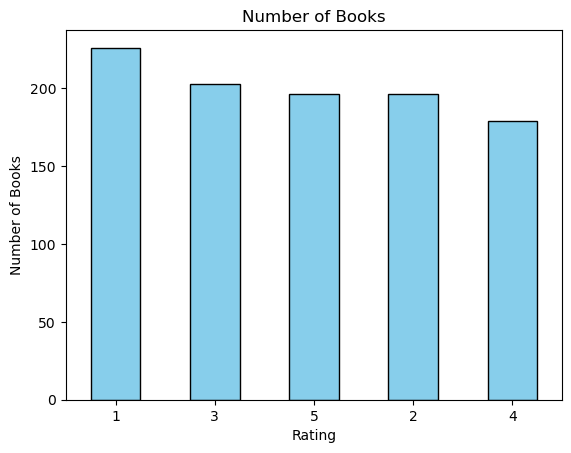

In [106]:
# using pandas
rating_counts.plot(kind='bar', title='Number of Books', color='skyblue',edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Number of Books')
plt.xticks(rotation=0)
plt.show()

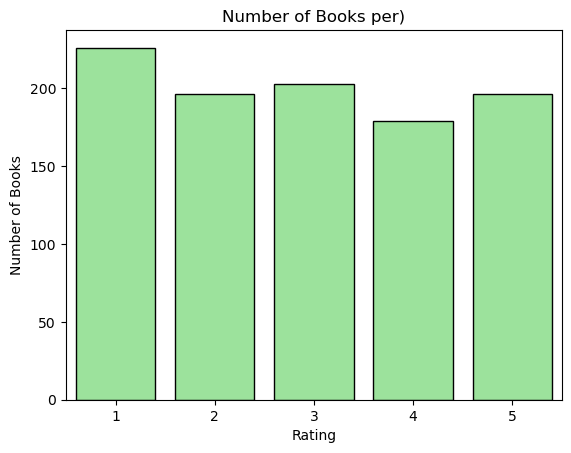

In [108]:
# Bar Plot using seaborn
import seaborn as sns
sns.countplot(x='rating', data=df,color='lightgreen',edgecolor='black')
plt.title('Number of Books per)')
plt.xlabel('Rating')
plt.ylabel('Number of Books')
plt.show()
# palette='viridis' for different type of colors


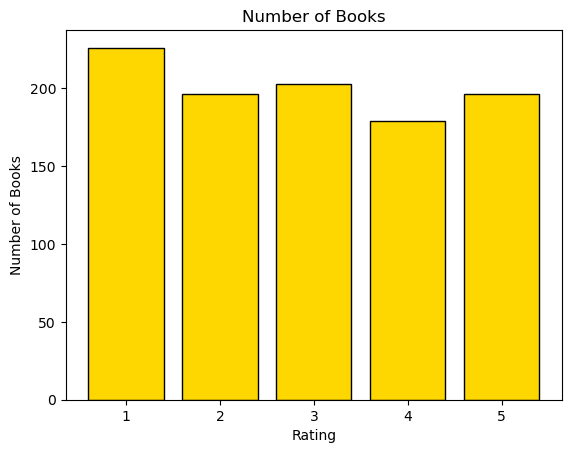

In [107]:
#using matplotlib.pyplot
import matplotlib.pyplot as plt

plt.bar(rating_counts.index, rating_counts.values, color='gold',edgecolor='black')
plt.title('Number of Books')
plt.xlabel('Rating')
plt.ylabel('Number of Books')
plt.xticks(rating_counts.index)
plt.show()


#### - **Histogram** showing the distribution of book prices.

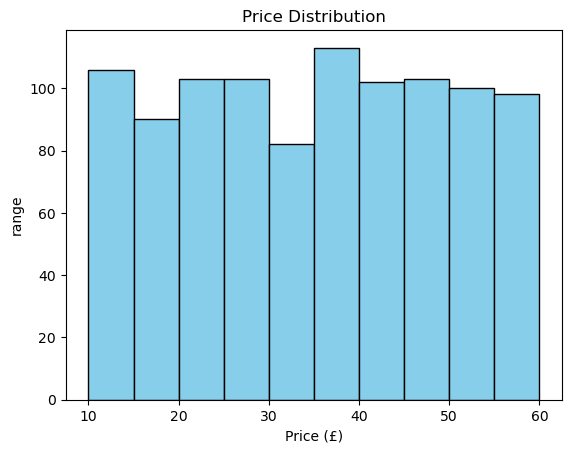

In [11]:
# using pandas
import matplotlib.pyplot as plt
df['price'].plot(kind='hist', bins=10, title='Price Distribution', edgecolor='black',color='skyblue')
plt.xlabel('Price (£)')
plt.ylabel('range') # its take defaultly 'frequency' display
plt.show()



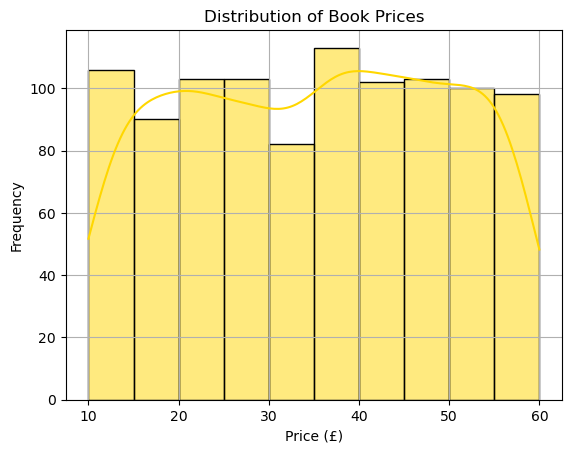

In [15]:
# df['price'] = df['price'].astype(str).str.replace('Â£', '', regex=False).astype(float)

# Plot Histogram
sns.histplot(df['price'], bins=10, kde=True, color='gold', edgecolor='black')
plt.title("Distribution of Book Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

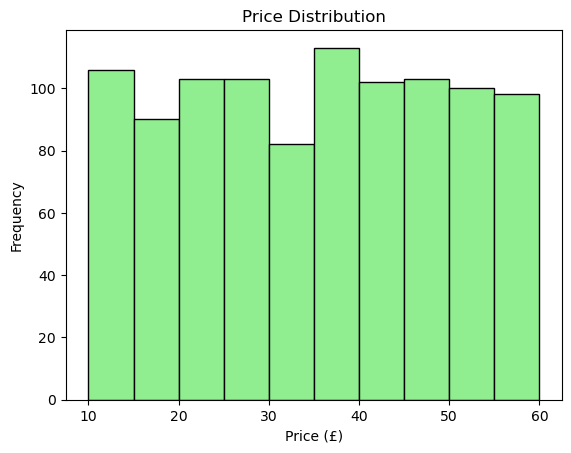

In [111]:
# using matplotlib.pyplot
plt.hist(df['price'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.show()


#### - **Pie chart** representing the proportion of books in stock vs. out of stock.

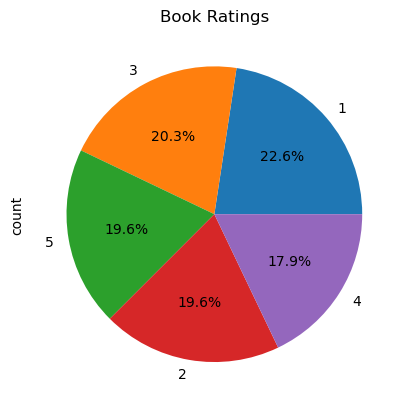

In [73]:
# Pie chart using pandas
rating_counts = df['rating'].value_counts()

#using pandas
rating_counts.plot(kind='pie', autopct='%1.1f%%', title='Book Ratings')
plt.show()


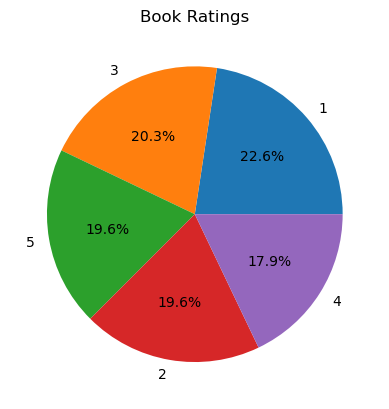

In [72]:
#using matplotlib
labels = rating_counts.index
sizes = rating_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Book Ratings')
plt.show()
# seaborn not support for the pie chart

#### - Any other creative visualization that helps understand the dataset.